# Section 1 - K-Means

## 1.1 Euclidean Distance

### 1.1.a 

In [41]:
import numpy as np
import matplotlib.pyplot as plt

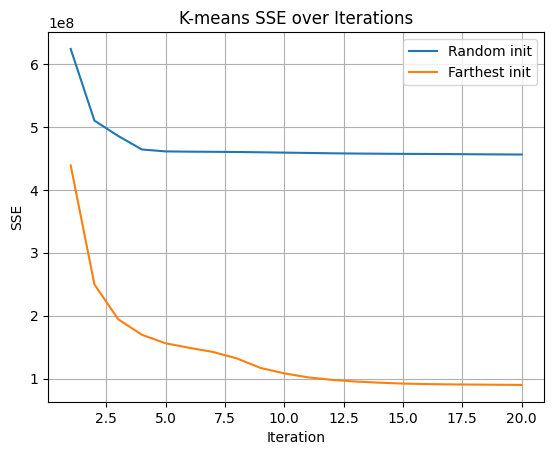

In [ ]:
#讀檔
f_data=open('data.txt','r')
f_init_farthest=open('init_farthest.txt','r')
f_init_random=open('init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

#SSE計算方法
def compute_sse(data,centers,labels):
    sse=0
    #根據分群的中心點計算
    for i,point in enumerate(data):
        center=centers[labels[i]]
        sse+=np.sum((point - center)**2)
    return sse

def kmeans(data,init_centers,max_iteration=20):
    centers=init_centers.copy()
    sseList=[]

    for _ in range(max_iteration):
        #計算與中心點距離(運用broadcast)
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        #分群並標記其中心群組
        labels = np.argmin(distances, axis=1)

        #計算SSE
        sse = compute_sse(data, centers, labels)
        sseList.append(sse)

        #更新中心點
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

        #中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break
        #更新中心點 
        centers=new_centers

    return sseList



sse_random = kmeans(data, random)
sse_farthest = kmeans(data, farthest)
#畫出不同初始點的方法
plt.plot(range(1,len(sse_random)+1), sse_random, label="Random init")
plt.plot(range(1,len(sse_farthest)+1), sse_farthest, label="Farthest init")
plt.xlabel("Iteration")
plt.ylabel("SSE")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 1.1.b 

In [43]:
#random
sse_random_change=(sse_random[0]-sse_random[10])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[10])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

sse_random: 0.2648391714456206
sse_farthest: 0.7669795594605943


#### A:從SSE百分比變化計算後可以得出，當我們使用farthest的方法去找尋初始點時可以有75%的變化。而使用random的方法只有約略25%，兩者相差接近3倍，因此使用farthest的方法去決定初始點會是一個更好的策略。其原因或許是當我們使用random方法時初始的資料點過於集中導致計算過程中陷入局部最優解或是收斂較慢，相較於farthest方法使用時可以更平均的覆蓋整個資料空間，並不是一個太好的選擇。

## 1.2 Manhattan Distance

### 1.2.a 

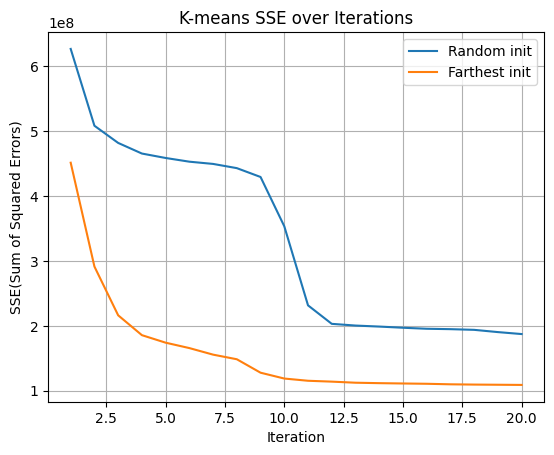

In [44]:
#讀檔
f_data=open('data.txt','r')
f_init_farthest=open('init_farthest.txt','r')
f_init_random=open('init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

#SSE計算
def compute_sse(data,centers,labels):
    sse=0
    #根據其中心點計算
    for i, point in enumerate(data):
        center=centers[labels[i]]
        sse += np.sum((point - center)**2)
    return sse
#k-means方法
def kmeans(data,init_centers,max_iter=20):
    centers=init_centers.copy()
    sse_list=[]

    for _ in range(max_iter):
        #計算點與中心點的距離
        distances = np.sum(np.abs(data[:, np.newaxis] - centers), axis=2)
        #找到中心群組並標記
        labels = np.argmin(distances, axis=1)

        #計算SSE
        sse = compute_sse(data, centers, labels)
        sse_list.append(sse)

        #找新的中心點
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

         #若中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break
        #更新中心點
        centers = new_centers

    return sse_list

import matplotlib.pyplot as plt

sse_random = kmeans(data,random)
sse_farthest = kmeans(data,farthest)
#畫圖
plt.plot(range(1, len(sse_random)+1), sse_random, label="Random init")
plt.plot(range(1, len(sse_farthest)+1), sse_farthest, label="Farthest init")
plt.xlabel("Iteration")
plt.ylabel("SSE(Sum of Squared Errors)")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 1.2.b 

In [45]:
#random
sse_random_change=(sse_random[0]-sse_random[10])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[10])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

sse_random: 0.6306626112819208
sse_farthest: 0.744680176259426


#### A:從結果來看，farthest方法的結果依然優於random方法，但比起使用歐氏距離計算，random方法在改採曼哈頓距離時有更好的結果SSE百分比變化從25%提升至43%，這是因為曼哈頓距離計算時對於離群值並不會太過於敏感，即便random方法在初始化中心點時偏離整個資料的中心，但在迭代計算新的中心點時也不會因此而有太大的SSE，這便會讓SSE百分比的變化看起來更大。

# Section 2 - Various Clustering Methods

## 2.1 Preprocess

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
#讀檔
df=pd.read_csv("Iris.csv")
#display(df)
X=df.drop(['Id','Species'],axis=1)
Y=df['Species']
#display(X)
#display(Y)

#標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

#display(X_scaled)


## 2.2 PCA Visualization

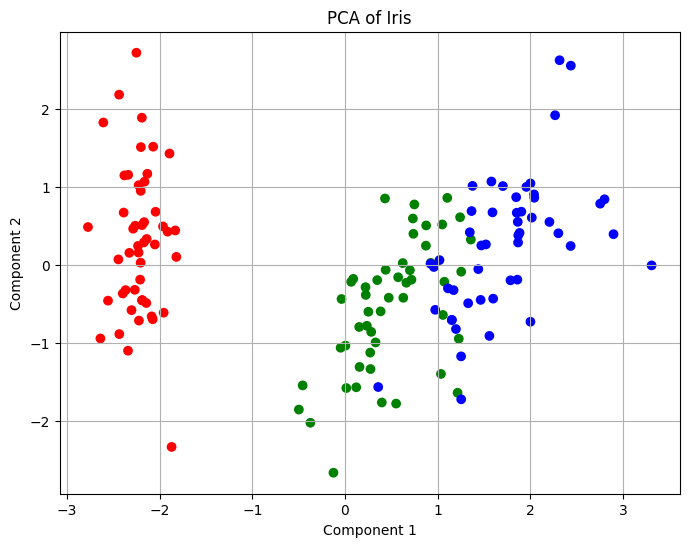

In [48]:
#設定PCA參數
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)

color_dict = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

#設定分類的顏色
colors = Y.map(color_dict)
#畫圖
plt.figure(figsize=[8,6])
plt.scatter(x_pca[:,0],x_pca[:,1],c=colors)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA of Iris")
plt.grid(True)
plt.show()

#### A:從圖中我們可以發現PCA主成分分析可以很好的把Setosa這一類與另外兩類分開，而versicolor、virginica雖然還有一小部分分布在同一區域，但大致上還是可以分的出來，因此我認為PCA主成分還是能達到不錯的效果。

## 2.3 Other Methods

In [49]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture

In [50]:
df=pd.read_csv("Iris.csv")
y=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).values
#K-means
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_scaled)
kmeans_label=kmeans.labels_
#DBSCAN
dbscan=DBSCAN()
dbscan.fit_predict(X_scaled)
dbscan_label = dbscan.labels_
#GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_scaled)
gmm_label=gmm.predict(X_scaled)

### 2.3.a 

In [51]:
from sklearn.metrics import adjusted_rand_score

In [52]:
ari_kmeans = adjusted_rand_score(y, kmeans_label)
ari_dbscan = adjusted_rand_score(y, dbscan_label)
ari_gmm = adjusted_rand_score(y, gmm_label)
print(f"KMeans ARI:{ari_kmeans:.3f}\nDBSCAN ARI:{ari_dbscan:.3f}\nGMM ARI:{ari_gmm:.3f}")

KMeans ARI:0.641
DBSCAN ARI:0.428
GMM ARI:0.904


#### A:單從分數上來看GMM方法給出了最好的結果，K-means次之，而DBSCAN為最低。

### 2.3.b

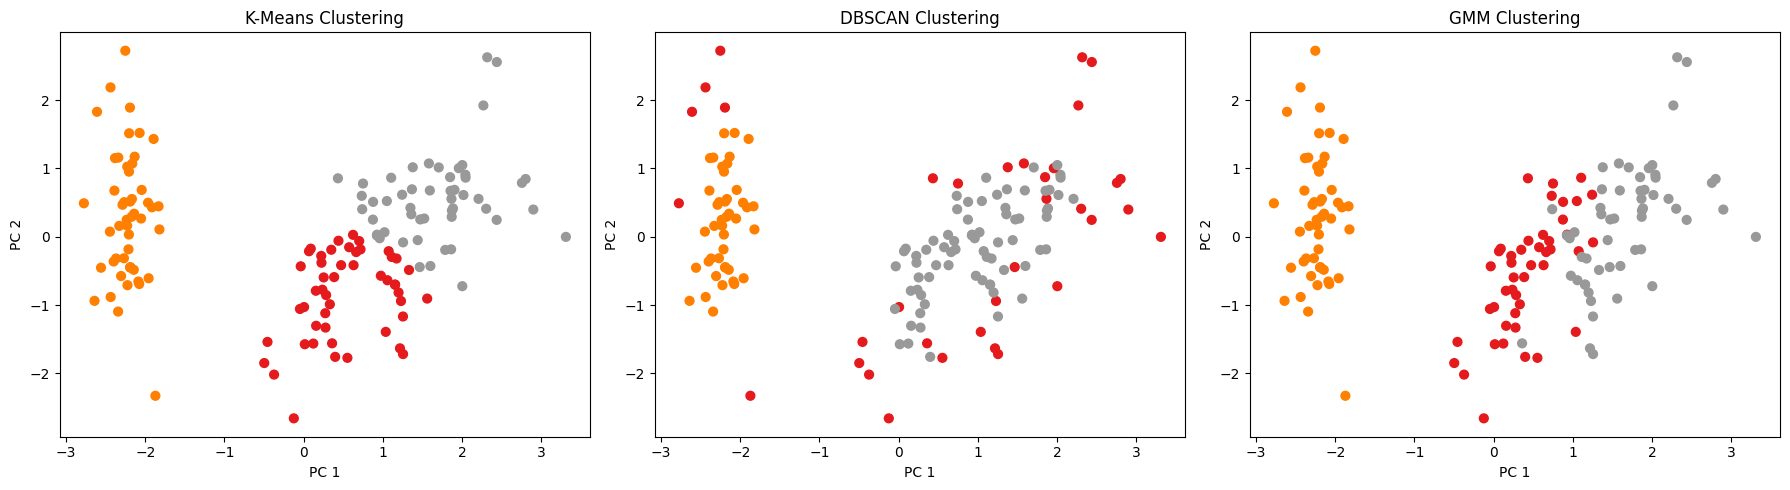

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

titles = ['K-Means Clustering', 'DBSCAN Clustering', 'GMM Clustering']
labels_list = [kmeans_label, dbscan_label, gmm_label]

for ax,title,labels in zip(axes, titles, labels_list):
    scatter = ax.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='Set1', s=40)
    ax.set_title(title)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')

plt.tight_layout()
plt.show()

#### A:從視覺上K-means給我最好的感受，三群分布完全分開。GMM則有一點點重疊，而DBSCAN有一類幾乎沒有分群成功，散佈在兩類之間。

### 2.3.c

#### A:從3(a)和3(b)的結果中我認為GMM會是最佳的方法，雖然說他在視覺上的第一印象是稍稍低於k-means方法的，但從ARI分數上來看他還是高出k-means不少，而且考慮到GMM的分布跟實際分布比較相近，因此綜合兩者的結果我覺得GMM會是最好的方法，